# Attention on VGGNet (grad-CAM)

In [1]:
import vis
from scipy.misc import imsave

In [2]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

Using TensorFlow backend.
/Users/nathanhubens/anaconda/envs/DeepLearning/lib/python3.6/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


/Users/nathanhubens/anaconda/envs/DeepLearning/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


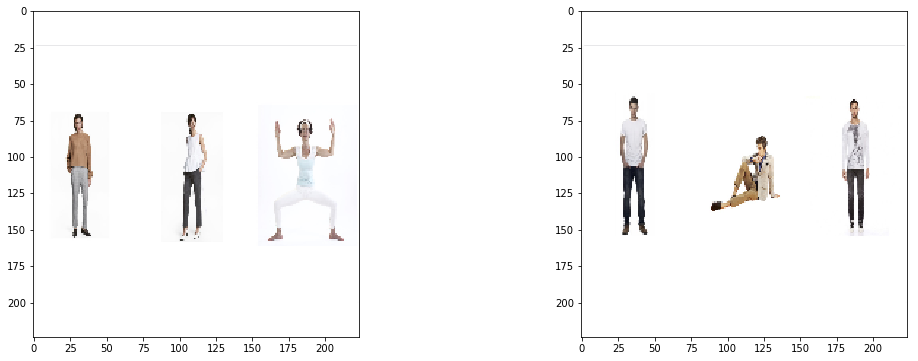

In [3]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('images/Set1_3.jpg', target_size=(224, 224))
img2 = utils.load_img('images/Set1_4.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [5]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

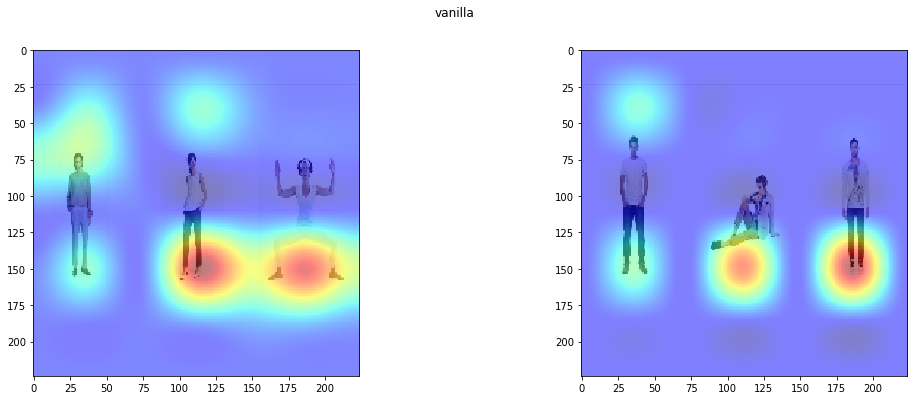

In [12]:
plt.figure()
f, ax = plt.subplots(1, 2)
plt.suptitle("vanilla")
for i, img in enumerate([img1, img2]):    
    grads = visualize_cam(model, layer_idx, filter_indices=20, 
                      seed_input=img, backprop_modifier=None)            
    jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
    ax[i].imshow(overlay(jet_heatmap, img))